# HW2 Coding

This workbook will walk you through the plotting problem 2(f) in HW2. It will also provide familiarity with Jupyter Notebook and Python. Please print (to pdf) a completed version of this workbook for submission with HW2.

ECE C143A/C243A, Spring Quarter 2020, Prof. J.C. Kao, TAs J. Lee, T. Monsoor

## Import library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Define the function

The function below, ``ptc()`` accepts the average firing rates at three targets and learns the parameters $c_0, c_1,$ and $\theta$ of the tuning curve.  Please implement this function below.  You may evaluate your execution by running the code under section "Plot the figure," which calculates the tuning parameters using your implementation of ``ptc()``.  The output should appear reasonable.

In [11]:
def ptc(y0 , y1 , y2):
    #PTC calculates the tuning curve given average firing rates for certain directions.
    
    # ================================================================ #
    # YOUR CODE HERE:
    #  The function takes three inputs corresponding to the average 
    #  firing rate of a neuron during a reach to 0 degrees (y0), 120 
    #  degrees (y1) and 240 degrees (y2). The outputs, c0, c1, and 
    #  theta0 are the parameters of the tuning curve.
    # ================================================================ #
    # y0 = 25, y120 = 70, y240 = 10
    # define pi
    pi = 3.14
    # define k1 k2, 
    k1 = y1-y2/np.sqrt(3)
    k2=(2/3)*(y0-((y1-y2)/2))
    k0 = y0-(2/3)*(y0-((y1-y2)/2))
    # c0
    c0 = k0
    theta0 = 2*pi*np.arctan((y2-y1)/(np.sqrt(3)*(2*c0-y1-y2)))
    c1 = k1/np.sin(theta0)
    

    # ================================================================ #
    # END YOUR CODE HERE
    # ================================================================ #

    return c0,c1,theta0

## Plot the figure

The following cells execute your PTC function, printing out the values and plotting the tuning curve.

In [12]:
c0, c1, theta0=ptc(25,70,10)
print('c0 = ', c0)
print('c1 = ', c1)
print('theta0 = ', theta0)

c0 =  28.333333333333332
c1 =  -456.4356253661551
theta0 =  6.142003606462213


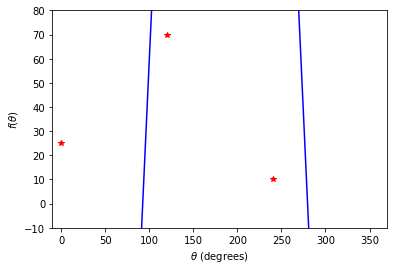

In [13]:
theta = np.linspace(0, 2*np.pi, num=80)
plt.plot([0,120,240],[25,70,10],'r*',10)
plt.plot(theta * 180 / np.pi,c0 + c1 *np.cos(theta - theta0 * np.pi/180),'b',2)
plt.xlim ([-10 ,370])
plt.ylim ([-10,80])
plt.xlabel(r'$\theta$ (degrees)');
plt.ylabel(r'$f(\theta)$');

### 2(g) calculation:

In [22]:
# define x
x = [[1, 1, 0], [1, 1/2, np.sqrt(3)/2], [1, (-1/2), np.sqrt(3)/2], [1, 1, 0], [1, (-1/2), (-np.sqrt(3)/2)], [1, 1/2, (-np.sqrt(3)/2)]]
# define y
y = [[25], [40], [70], [30], [10], [15]]
# solutioin
w=np.linalg.inv(np.dot(np.transpose(x),x))
w = np.dot(w,np.transpose(x))
w = np.dot(w, y)

In [23]:
print(w)

[[34.64285714]
 [-8.92857143]
 [24.53738644]]


In [24]:
thera0 = np.arctan(w[2]/w[1])

In [27]:
c1 = w[1]/np.cos(theta0)
c0 = w[0]

In [28]:
print("c1: ", c1, "c0: ", c0, "theta0: ", theta0)

c1:  [-9.01829984] c0:  [34.64285714] theta0:  6.142003606462213
